In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

We define a function for doing finite difference given a function on a grid size $h=1/n$ spread between $0$ and $1$

$$ f'(x_j) = {\frac 1h}\left(f(x_{j+1}) - f(x_j) \right) $$

Input to the function
1. The call to the function to be differentiated

2. The begining and end of the interval

3. The number of points to discretize





Number of points = 16  Mesh size = 2.67e-01  Maximum Error = 2.77e-01


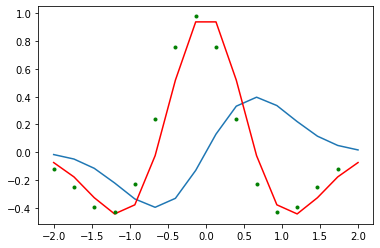

In [7]:
# Define a function to be differentiated
def func(x):
  f = torch.sin(x)*torch.exp(-x**2)

  return f

# For testing reasons only compute analytical derivative
def dfuncdx(x):
  df = torch.exp(-x**2)*torch.cos(x) - 2*x*torch.exp(-x**2)*torch.sin(x)

  return df

# plot the function and play with n
# The mesh
n = 16
x = torch.linspace(-2,2,n)
y = func(x)

plt.plot(x,y)

# The derivative 
h = x[1]-x[0]
dydxNum  = (y[1:]-y[:-1])/h
dydxTrue = dfuncdx(x)

plt.plot(x, dydxTrue,'r')
plt.plot(x[:-1], dydxNum,'.g')

# The error
r = (dydxTrue[:-1] - dydxNum).abs()
print('Number of points = %2d  Mesh size = %3.2e  Maximum Error = %3.2e'%(n, h, r.max()))





In [14]:
# Wrap the finite difference in a function
def finiteDifference(fun, I, n):

  # Mesh size
  h = (I[1]-I[0])/n
  x = torch.linspace(I[0], I[1], n+1)  # why n+1?
  # evaluate the function on the mesh
  f = fun(x)

  dfdx = (f[1:]-f[:-1])/h

  return dfdx, x[:-1]


In [15]:
# Test the code
I = [-2.0, 2.0]
n = 32
dfdx, x = finiteDifference(func, I, n)


How do we estimate the error when we do not know the real answer?

Idea: Solve it on two meshes one coarse and one fine and see the difference


Mesh sizes = [16  32]   estimated error = 1.23e-01


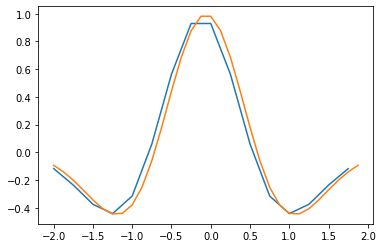

In [26]:
I = [-2.0, 2.0]
nc = 16
dfdx32, x32 = finiteDifference(func, I, nc)
plt.plot(x32, dfdx32)

nf = 32
dfdx64, x64 = finiteDifference(func, I, nf)
plt.plot(x64, dfdx64)

r = (dfdx64[:-1:2] - dfdx32).abs()
print('Mesh sizes = [%d  %d]   estimated error = %3.2e'%(nc, nf, r.max()))

